#### Laboratorio 1 - Machine Learning

**Objetivo**: En este laboratorio deberá investigar del uso de la librería python scikit-learn y sus funciones más útiles. Su
meta es realizar un análisis de datos, PCA y posterior clasficador utilizando el algoritmo Naive Bayes.
Para esto, utilizará la base Wine que puede descargar desde 'https://archive.ics.uci.edu/ml/datasets/Wine' o bien utilizar
la que se encuentra en la librería scikit-learn bajo el nombre de load_wine.

Se le evaluará por:

- Importe la libería Scikit-learn de forma correcta. Importe otras liberías que consideraría útiles para su análisis y
comente por qué las usará. Cargue los datos.
- Exploración de datos. Muestre información que considere relevante y explique brevemente por qué considera que lo es.
- Selección de muestras. Explique cómo tomó las muestras para su análisis brevemente y qué hiperparámetros utilizó.
- Ejecute el clasficador. Muestre sus resultados, argumente sobre el modelo. Argumente por qué hizo o dejó de hacer
fine-tunning
- Concluya.

#### Carga de Librerías

In [4]:
# A continuación se realizará la carga de librerías que nos serán útiles para trabajar y cargar el dataset Wine

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [5]:
# Realizaremos la carga de wine.csv y le asignaremos nombre a cada columna, ya que el dataset viene por defecto sin sus encabezados

wine = pd.read_csv("C:/Users/kurtc/Documents/GitHub/VinosMachineLearning/Notebooks/Wine.csv", header=None)

wine.columns = ["class", "alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
                "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline"]

#### Exploración de Datos

In [6]:
# Vista general de la estructura del dataset

wine.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# Contaremos la cantidad de filas por cada categoría "class"

wine["class"].value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

In [8]:
# Información general del dataset

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

In [9]:
# Estadísticas básicas del dataset

wine.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


A continuación, se mostrará un pairplot, para ver el comportamiento de las diferentes variables del dataset respecto a otra:

<function matplotlib.pyplot.show(close=None, block=None)>

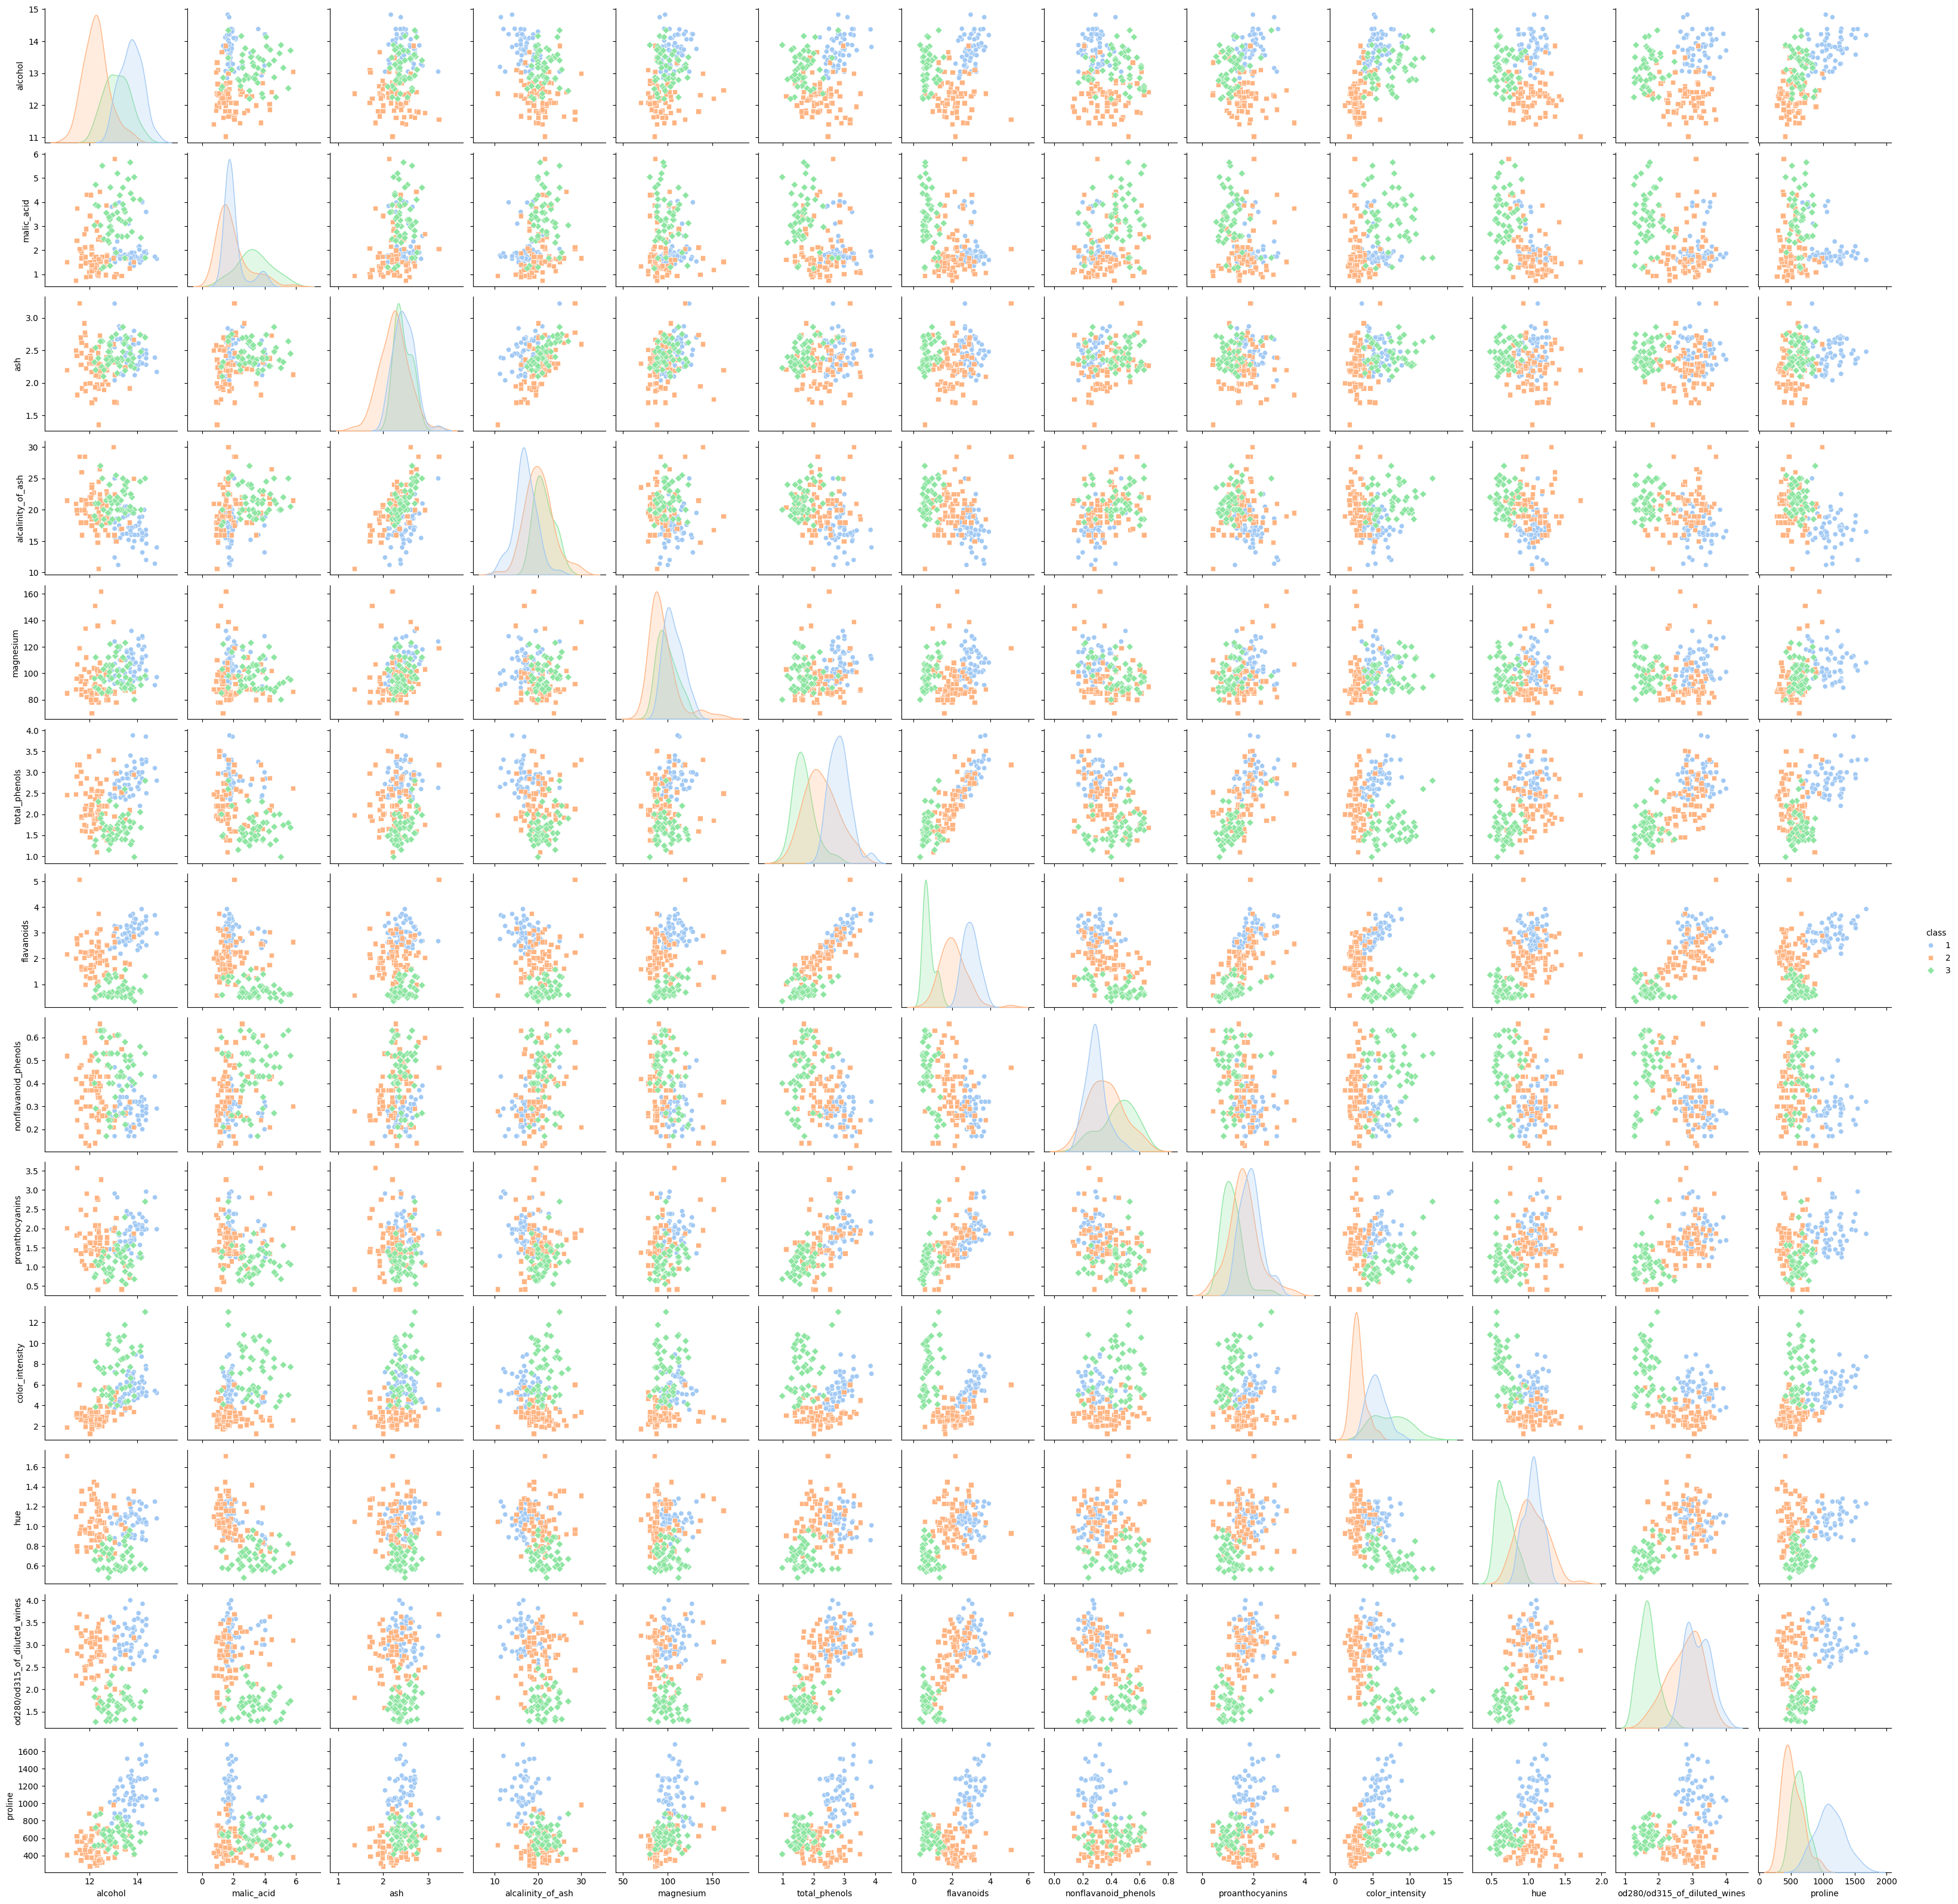

In [10]:
sns.pairplot(wine, diag_kind="kde", hue="class", palette="pastel" ,markers=["o", "s", "D"])
plt.show

Al visualizar el gráfico, podemos ver existen pocas variables que tienden a tener una correlación líneal (digo tienden porque no se ve alguna correlación lineal clara)

Es por esto que estandarizaremos las variables. Para esto, crearemos un nuevo dataframe el cual se llamará "X".

In [11]:
X = StandardScaler(with_std=True,with_mean=True).fit_transform(wine)
pd.DataFrame(X, columns = wine.columns).head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Una vez creado nuestro nuevo dataset llamado "X", aplicaremos el PCA a nuestros datos estandarizados y luego la varianza explicada para cada uno de los componentes, la cual será graficada y nos permitirá elegir el número óptimo de componentes a conservar

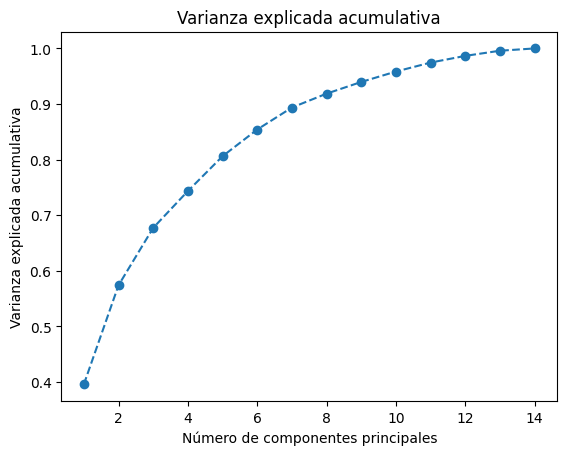

In [12]:
pca = PCA()

# Aplicar PCA a tus datos estandarizados
principal_components = pca.fit_transform(X)

# Explorar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Visualizar la varianza explicada acumulativa para decidir cuántos componentes conservar
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulativa')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.show()

Realizaremos una reducción de la dimensionalidad usando PCA

In [13]:
n_components = 8
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

# Ahora tienes tus datos reducidos a n_components características
pc_df=pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

Ahora realizaremos la suma de las varianzas de los primeros "x" componentes principales, para así saber que proporción de la varianza total de los datos originales representaran los "x" componentes

In [14]:
pca.explained_variance_ratio_[0:8].sum()

0.9186521659731058

Al sumar 8 componentes explican el 91.87% de la varianza de los datos originales 

Volveremos a realizar un pairplot para ver el comportamiento de los diferentes componentes principales respectos a los otros

<function matplotlib.pyplot.show(close=None, block=None)>

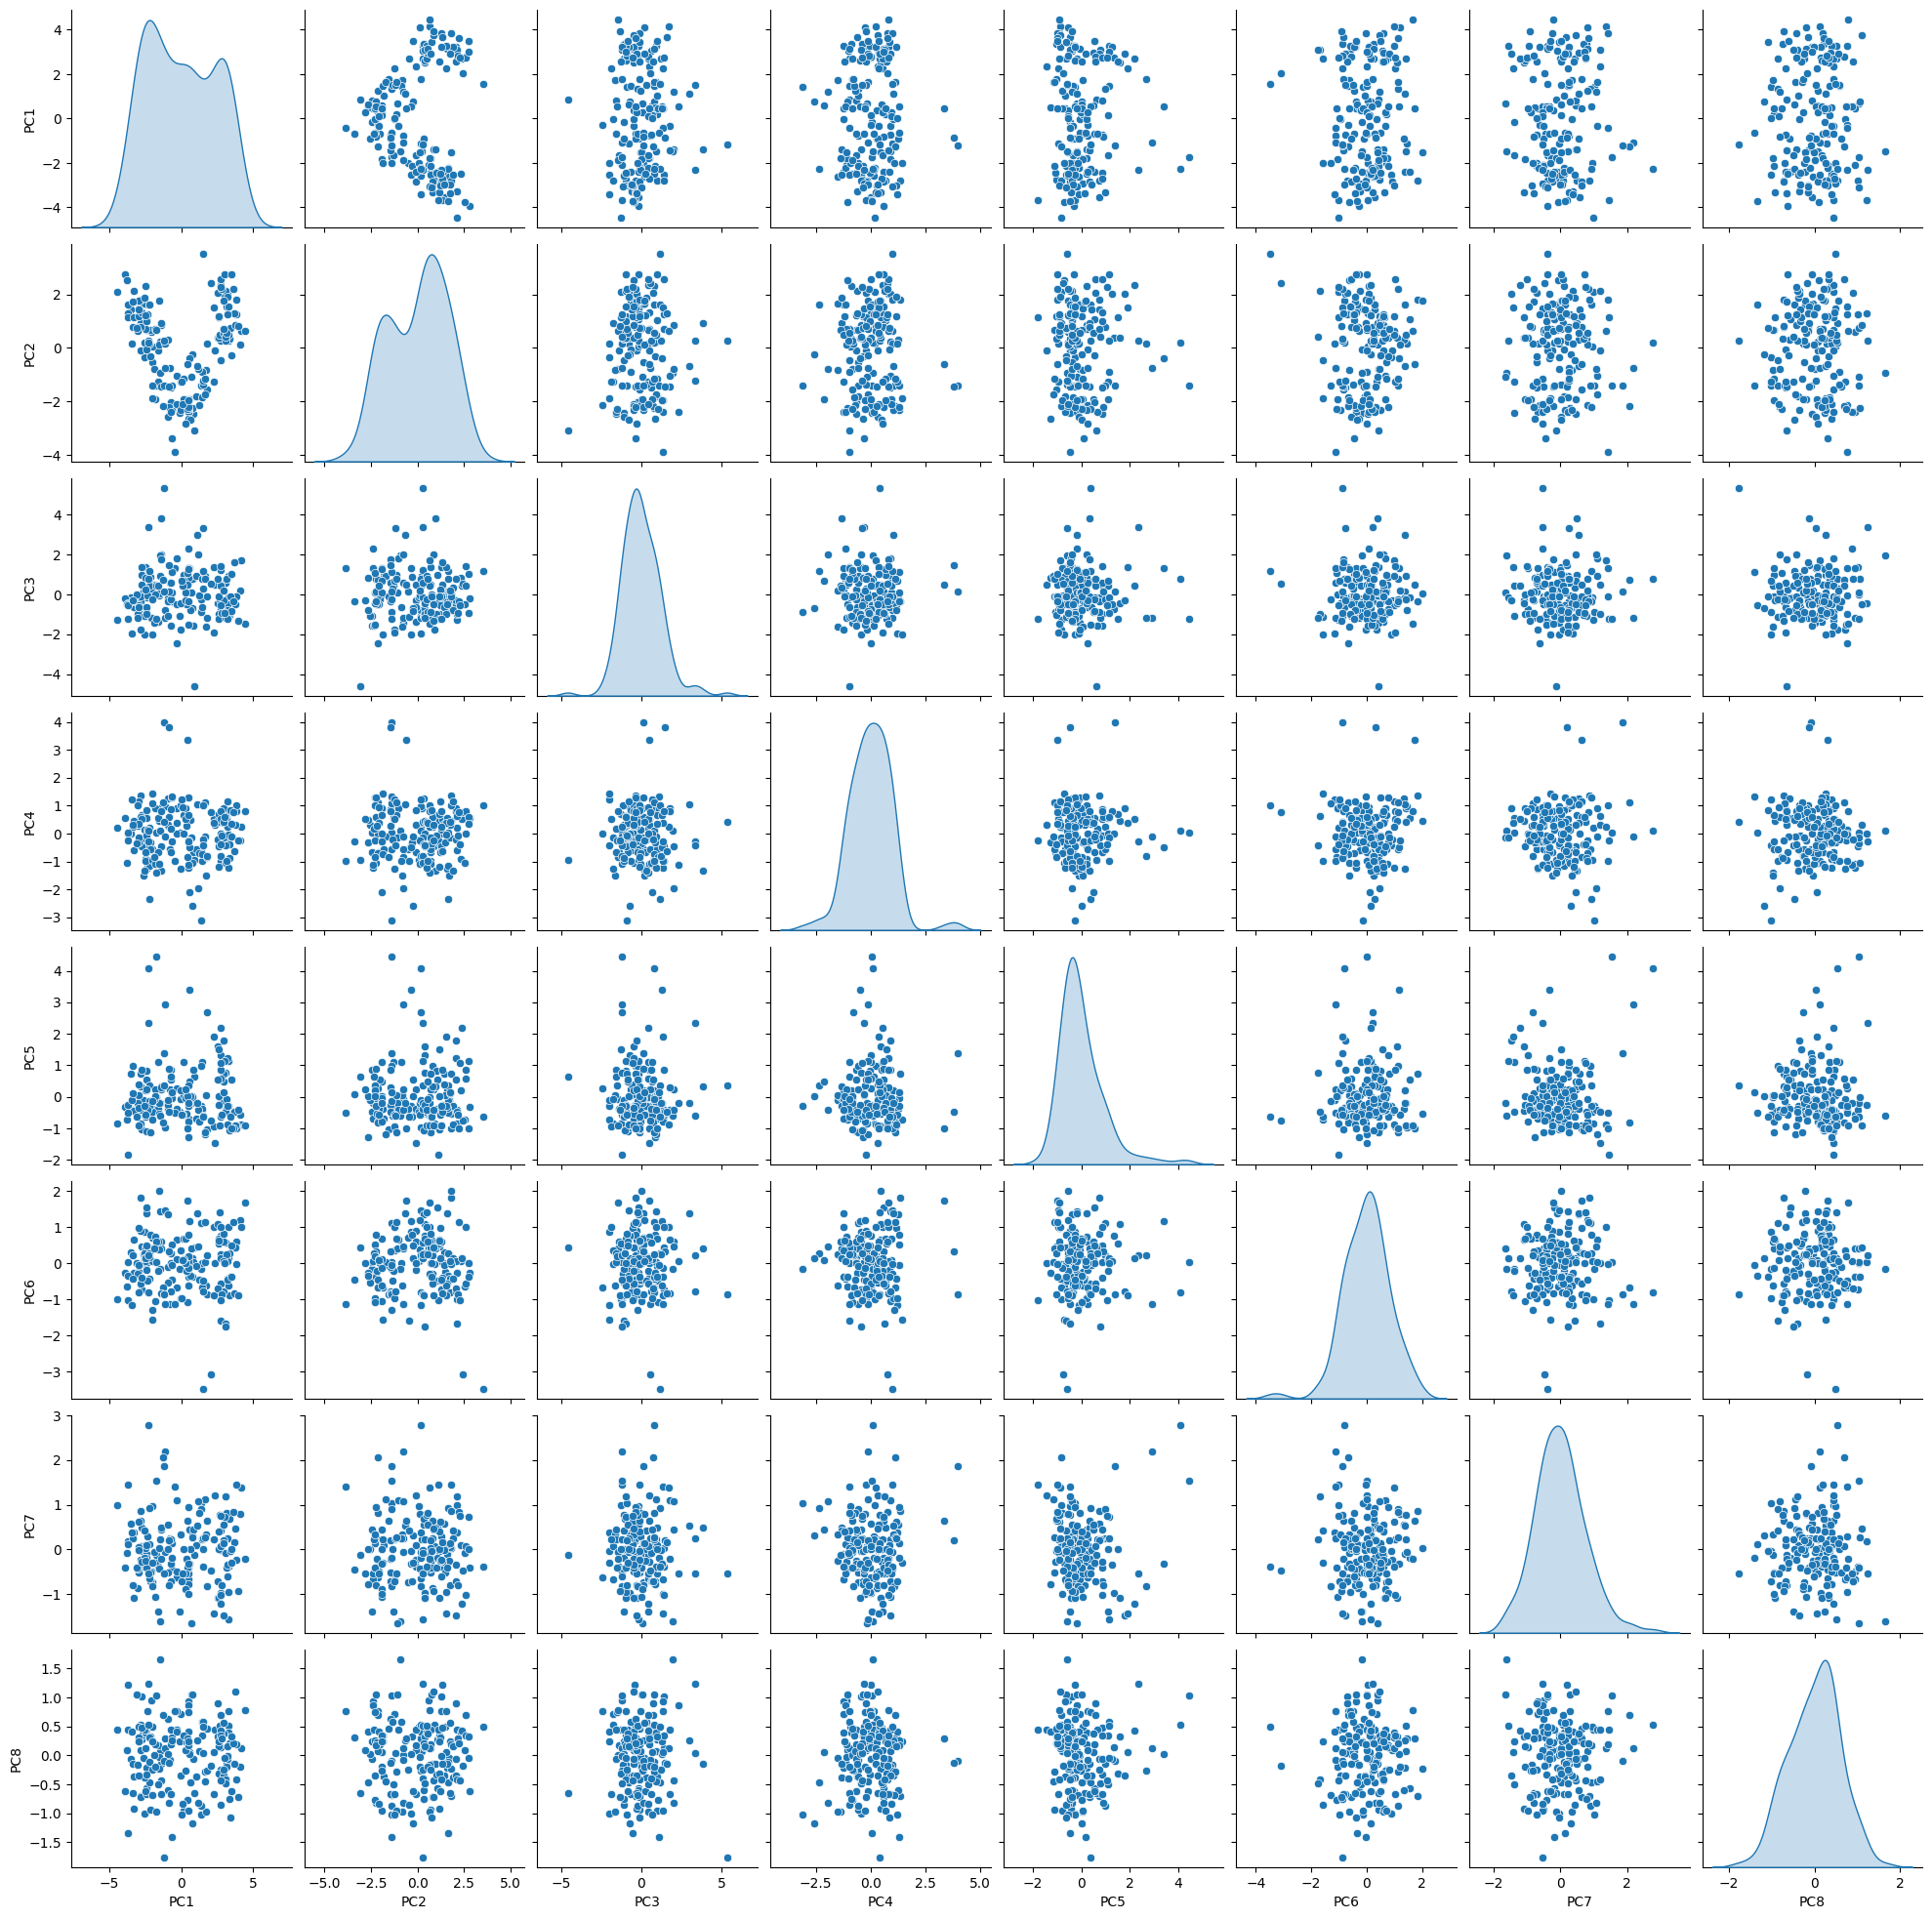

In [15]:
sns.pairplot(pc_df, diag_kind="kde")
plt.show

Luego de haber disminuido las dimensiones del dataset a 8, identificaremos cuales son las variables originales más importantes para cada Componente Principal despúes de haber aplicado el PCA. Dado lo anterior, también podremos entender que variables están influyendo en la variabilidad del dataset.

In [16]:
# Crear un DataFrame con las cargas de cada variable en cada componente principal
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components + 1)], index=wine.columns)

#Importancia de las variables
loadings_abs = loadings.abs()

# Mostrar las 5 variables con las cargas más altas para cada componente principal
top_loadings = loadings_abs.apply(lambda x: x.nlargest(5).index)

# Mostrar las cargas
print("Cargas de variables en cada componente principal:")
print(top_loadings)

Cargas de variables en cada componente principal:
                            PC1              PC2  \
0                         class  color_intensity   
1                    flavanoids          alcohol   
2                 total_phenols          proline   
3  od280/od315_of_diluted_wines              ash   
4               proanthocyanins        magnesium   

                            PC3                   PC4                   PC5  \
0                           ash            malic_acid             magnesium   
1             alcalinity_of_ash       proanthocyanins  nonflavanoid_phenols   
2                       alcohol                   hue               alcohol   
3          nonflavanoid_phenols  nonflavanoid_phenols            malic_acid   
4  od280/od315_of_diluted_wines               proline                 class   

                            PC6                   PC7                PC8  
0                    malic_acid  nonflavanoid_phenols                hue  
1           

Crearemos un gráfico de barras horizontales que nos mostrarán las variables más importantes para cada uno de los componentes principales obtenidos del análisis PCA:

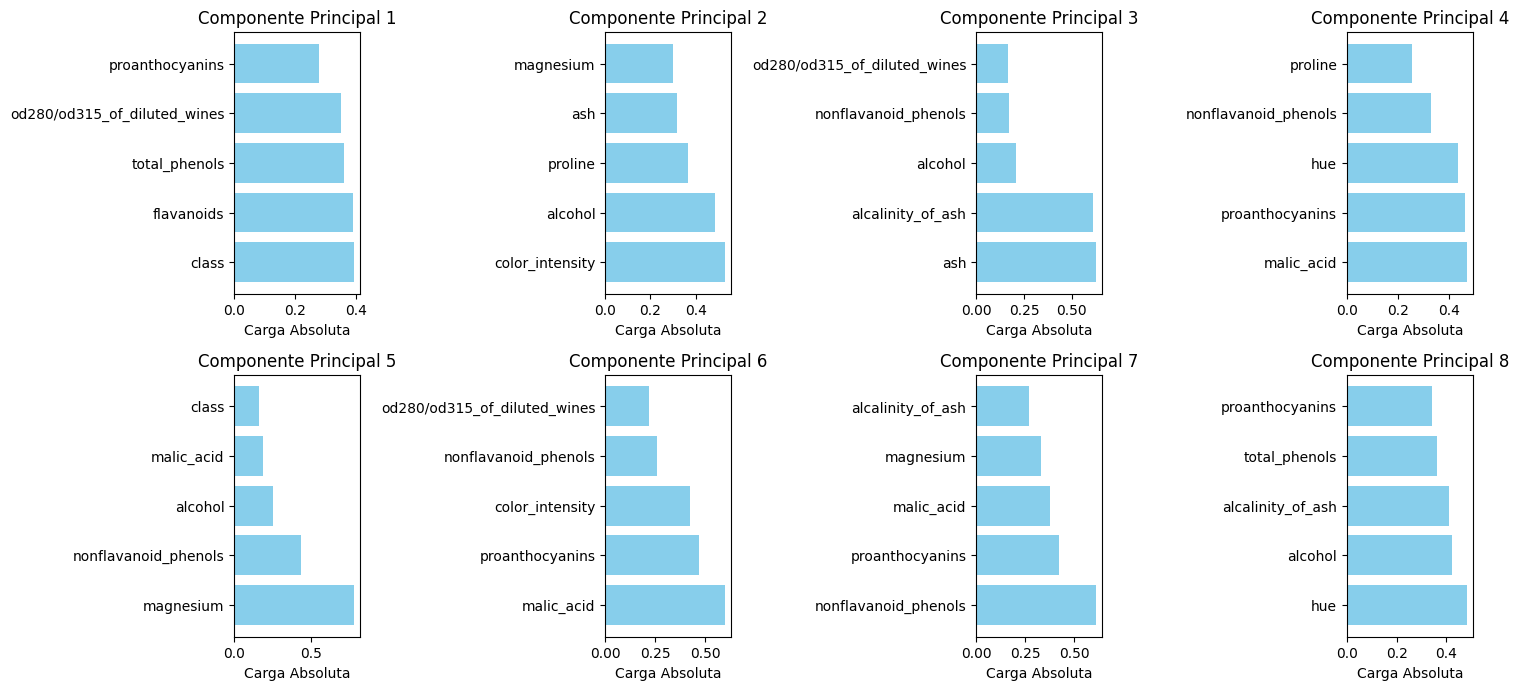

In [17]:
plt.figure(figsize=(15, 10))

for i in range(n_components):
    plt.subplot(3, 4, i + 1) #grafico de 3 filas y 3 columnas para visualizar cada componente
    top_vars = top_loadings[f'PC{i+1}'] #muestra los variables con mayor importancia para cada componente
    loading_values = loadings_abs[f'PC{i+1}'][top_vars]
    plt.barh(top_vars, loading_values, color='skyblue')
    plt.xlabel('Carga Absoluta')
    plt.title(f'Componente Principal {i+1}')

plt.tight_layout()
plt.show()

- **Componente Principal 1**:

Las variables más influyentes son class, flavanoids, total_phenols, od280/od315_of_diluted_wines, y proanthocyanins.
Estas variables tienen una alta carga absoluta, lo que indica que tienen una gran influencia en la definición de este primer componente.
- **Componente Principal 2**:

Las variables color_intensity, alcohol, proline, ash, y magnesium son las más influyentes.
Estas características contribuyen significativamente a la varianza explicada por el segundo componente principal, indicando que este componente está capturando variabilidad relacionada con la intensidad de color y composición química de las muestras.

- **Componente Principal 3**:

Las variables principales aquí son color_intensity, alcalinity_of_ash, alcohol, nonflavanoid_phenols, y od280/od315_of_diluted_wines.
Este componente parece estar relacionado con aspectos químicos específicos y propiedades del color.

- **Componente Principal 4**:

Las variables destacadas son malic_acid, proanthocyanins, hue, nonflavanoid_phenols, y proline.
Este componente puede estar capturando variabilidad relacionada con la acidez y coloración de las muestras.

- **Componente Principal 5**:

Las variables más influyentes son magnesium, nonflavanoid_phenols, alcohol, malic_acid, y class.
Este componente podría estar enfocado en la variabilidad relacionada con la composición mineral y la acidez.

- **Componente Principal 6**:

Las variables claves son malic_acid, proanthocyanins, color_intensity, nonflavanoid_phenols, y od280/od315_of_diluted_wines.
Este componente parece capturar variabilidad relacionada con la acidez, la intensidad de color y la composición fenólica.

- **Componente Principal 7**:

Las variables principales son nonflavanoid_phenols, proanthocyanins, magnesium, alcalinity_of_ash, y malic_acid.
Este componente está relacionado con variabilidad en la composición mineral y fenólica.

- **Componente Principal 8**:

Las variables más influyentes son hue, alcohol, alcalinity_of_ash, total_phenols, y proanthocyanins.
Este componente puede estar relacionado con variabilidad en la coloración y la composición química.

Ahora importaremos el modelo de clasificación GaussianNB del módulo Naive Bayes de Scikit-Learn

In [18]:
# Creamos la instancia para implementar algoritmo de Naive Bayes

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [19]:
# Defino cual es mi variable objetivo dentro del dataset

wine_type= wine["class"]

A continuación, usaremos la función train_test_split para separar nuestros datos en un conjunto para entrenar el modelo. La proporción a utilizar será de 70/30.
Con esto ya hemos realizado una selección de muestra y definido hiperparámetros

In [20]:
# Dividiremos nuestros datos en dos subconjuntos: uno para entrenamiento (train) y otro para pruebas (test). Dado lo anterior importaremos la siguiente función:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pc_df, wine_type, train_size = 0.7, random_state=1234)

In [21]:
model.fit(X_train,y_train)

GaussianNB()

Crearemos la variable "labels", la cual almacenará las etiquetas del modelo para el conjunto de datos de prueba X_test

In [22]:
labels = model.predict(X_test)

Ahora realizaremos una matriz de confusión, con la cuál podremos analizar los elementos que se muestren en la diagonal, que serán las instancias que sean correctamente clasificadas, y fuera de la diagonal, errores que existan en la clasificación:

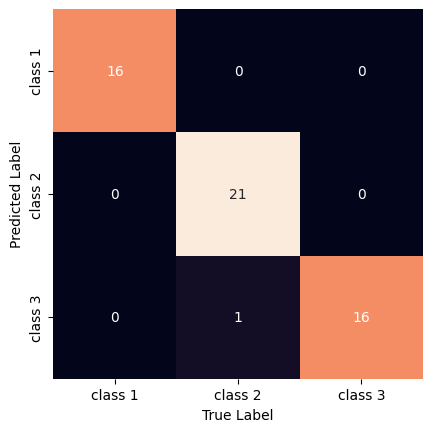

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= ["class 1", "class 2", "class 3"], yticklabels= ["class 1", "class 2", "class 3"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label');


- (1,1): 16 - El modelo predijo correctamente 16 veces la primera clase (clase 1).
- (2,2): 21 - El modelo predijo correctamente 21 veces la segunda clase (clase 2).
- (3,3): 16 - El modelo predijo correctamente 16 veces la tercera clase (clase 3).

- (2,3): 1 - El modelo predijo una vez la segunda clase (clase 2), cuando la etiqueta verdadera era la tercera clase (clase 3). Este es un error del modelo.

El modelo muestra en general un muy buen desempeño. Esto se podrá evidenciar una vez calculemos las métricas para evaluar el rendimiento del modelo, lo que se presentará a continuación:

In [24]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

print(f'precision: {precision_score(labels, y_test, average="macro")}')
print(f'recall: {recall_score(labels, y_test, average="macro")}')
print(f'accuracy: {accuracy_score(labels, y_test)}')
print(f'f1 score: {f1_score(labels, y_test, average="macro")}')


precision: 0.9848484848484849
recall: 0.9803921568627452
accuracy: 0.9814814814814815
f1 score: 0.9821470519144938


##### **Conclusión**

 El modelo tiene una alta precisión, lo que significa que casi todas las predicciones positivas fueron correctas, y un buen recall, lo que indica que identificó correctamente la mayoría de las instancias positivas.

 Al observar los resultados de las 4 métricas, podemos concluir que se presenta un modelo con un gran desempeño y es confiable para lo que fue entrenado. Es por esto que no es necsario realizar ajustes o fine-tuning al modelo.